In [30]:
#Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import sqlalchemy
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Basic Terminology

* **Sentence Tokenization:** Breaking down paragraphs or a complete set of texts into sentences

* **Word Tokenization:** Breaking down paragraph/text corpus into individual words.

* **Stop Words:** Commonly used words in a language that add very little meaning to the body of text from an analysis point of view (but very valuable to actually understand the language). They are essentially noise in the corpus of text. Removing stopwords removes noise from the text and reduces the sizr of the data to be analyzed

* **Stemming:** Process of converting words to root words. For example, running -> run. Process of linguistic normalization

* **Lemmatizing:** Process of converting words to base words. For example, stemming of the word "better" -> "better", but lemmatizing might return the word "good"

* **Part of Speech tagging:** tags words based on what part of speech they are (noun, pronoun etc.)

## NLP "Descriptive Statistics"

* **Frequency Distribution Plotting:** Counts and plots the frequency of words in a given text

* **Word Tokenization:** Breaking down paragraph/text corpus into individual words.


In [3]:
#Load NSF Awards Dataset. This dataset consists of awards in AI and ML that NSF awarded in 2019-2020

data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/Awards1920.csv")
data = data.dropna(axis=1) #drop null columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AwardNumber            1618 non-null   int64 
 1   Title                  1618 non-null   object
 2   NSFOrganization        1618 non-null   object
 3   StartDate              1618 non-null   object
 4   LastAmendmentDate      1618 non-null   object
 5   PrincipalInvestigator  1618 non-null   object
 6   State                  1618 non-null   object
 7   Organization           1618 non-null   object
 8   AwardInstrument        1618 non-null   object
 9   ProgramManager         1618 non-null   object
 10  EndDate                1618 non-null   object
 11  AwardedAmountToDate    1618 non-null   object
 12  OrganizationCity       1618 non-null   object
 13  OrganizationState      1618 non-null   object
 14  OrganizationZip        1618 non-null   int64 
 15  NSFDirectorate       

In [4]:
#We want to analyze abstracts. So, load abstracts into an variable
abstracts = data['Abstract']

### Sentence Tokenizer

In [9]:
#Tokenize sentence
sent_tk = [sent_tokenize(x) for x in abstracts]

In [10]:
#Calculate average sentence length
sum=0
for x in sent_tk:
  sum += len(x)

sum = sum/len(sent_tk)

print('Average number of sentences in an abstract is %0.3f' % sum)

Average number of sentences in an abstract is 13.606


### Word Tokenize

In [11]:
#Tokenize sentence
word_tk = [word_tokenize(x) for x in abstracts]
#Calculate average sentence length
sum=0
for x in word_tk:
  sum += len(x)
sum = sum/len(word_tk)

print('Average number of words in an abstract is %0.3f' % sum)

Average number of words in an abstract is 474.703


### Clean Special Characters

In [78]:
#Filter out special
cleaned_words = []

for abstract in word_tk:

  #Convert list of words into string
  abs_string = ' '.join(abstract)
  new_text = re.sub('<.*?>', '', abs_string)   # remove HTML tags
  new_text = re.sub(r'[^\w\s]', '', new_text) # remove punctuation
  new_text = re.sub(r'\d+','',new_text)# remove numbers
  new_text = new_text.lower() # lower case, .upper() for upper
  if new_text != '':
    cleaned_words.append(word_tokenize(new_text))

In [79]:
print('Sample of cleaned words: ', cleaned_words[0])

Sample of cleaned words:  ['deep', 'artificial', 'neural', 'network', 'technology', 'has', 'been', 'widely', 'used', 'to', 'solve', 'many', 'challenging', 'tasks', 'in', 'computer', 'vision', 'natural', 'language', 'processing', 'speech', 'recognition', 'and', 'more', 'most', 'of', 'today', 's', 'deep', 'learning', 'algorithms', 'are', 'designed', 'for', 'high', 'performance', 'servers', 'and', 'running', 'in', 'the', 'cloud', 'as', 'the', 'edge', 'devices', 'eg', 'mobile', 'phones', 'and', 'smart', 'watches', 'become', 'more', 'capable', 'and', 'the', 'advantages', 'of', 'ondevice', 'artificial', 'intelligence', 'ai', 'eg', 'protecting', 'privacy', 'working', 'without', 'a', 'network', 'processing', 'data', 'locally', 'in', 'realtime', 'become', 'more', 'evident', 'bringing', 'ai', 'to', 'the', 'edge', 'will', 'be', 'inevitable', 'however', 'the', 'limited', 'resources', 'eg', 'computation', 'memory', 'and', 'battery', 'of', 'edge', 'devices', 'bring', 'a', 'whole', 'new', 'level', 'o

### Remove Stop Words

In [80]:
#Get stopwords
stop_words = list(set(stopwords.words("english"))) + ['br', 's']
#Filter out stop words
filtered_words = [[w for w in abstract if not w in stop_words] for abstract in cleaned_words]

In [81]:
print('Sample of filtered words: ', filtered_words[0])

Sample of filtered words:  ['deep', 'artificial', 'neural', 'network', 'technology', 'widely', 'used', 'solve', 'many', 'challenging', 'tasks', 'computer', 'vision', 'natural', 'language', 'processing', 'speech', 'recognition', 'today', 'deep', 'learning', 'algorithms', 'designed', 'high', 'performance', 'servers', 'running', 'cloud', 'edge', 'devices', 'eg', 'mobile', 'phones', 'smart', 'watches', 'become', 'capable', 'advantages', 'ondevice', 'artificial', 'intelligence', 'ai', 'eg', 'protecting', 'privacy', 'working', 'without', 'network', 'processing', 'data', 'locally', 'realtime', 'become', 'evident', 'bringing', 'ai', 'edge', 'inevitable', 'however', 'limited', 'resources', 'eg', 'computation', 'memory', 'battery', 'edge', 'devices', 'bring', 'whole', 'new', 'level', 'challenges', 'ondevice', 'ai', 'must', 'keep', 'model', 'size', 'small', 'without', 'sacrificing', 'accuracy', 'ondevice', 'ai', 'must', 'keep', 'power', 'usage', 'low', 'future', 'ondevice', 'ai', 'enable', 'effic

### Stem Words

In [20]:
from nltk.stem import PorterStemmer

#Instantiate a PorterStemmer class
port_stem = PorterStemmer()
#Stem words in the abstract
stemmed_words = [[port_stem.stem(w) for w in abstract] for abstract in filtered_words]

In [24]:
print('Sample of stemmed words: ', stemmed_words[0])

Sample of stemmed words:  ['deep', 'artifici', 'neural', 'network', 'technolog', 'wide', 'use', 'solv', 'mani', 'challeng', 'task', 'comput', 'vision', 'natur', 'languag', 'process', 'speech', 'recognit', 'most', 'today', 's', 'deep', 'learn', 'algorithm', 'design', 'high', 'perform', 'server', 'run', 'cloud', 'as', 'edg', 'devic', 'e', 'g', 'mobil', 'phone', 'smart', 'watch', 'becom', 'capabl', 'advantag', 'on', 'devic', 'artifici', 'intellig', 'ai', 'e', 'g', 'protect', 'privaci', 'work', 'without', 'network', 'process', 'data', 'local', 'real', 'time', 'becom', 'evid', 'bring', 'ai', 'edg', 'inevit', 'howev', 'limit', 'resourc', 'e', 'g', 'comput', 'memori', 'batteri', 'edg', 'devic', 'bring', 'whole', 'new', 'level', 'challeng', '1', 'on', 'devic', 'ai', 'must', 'keep', 'model', 'size', 'small', 'without', 'sacrif', 'accuraci', '2', 'on', 'devic', 'ai', 'must', 'keep', 'power', 'usag', 'low', '3', 'futur', 'on', 'devic', 'ai', 'enabl', 'effici', 'process', 'analysi', 'multi', 'moda

### Lemmatize Words

In [28]:
from nltk.stem.wordnet import WordNetLemmatizer

#Instantiate Lemmatizer
lem = WordNetLemmatizer()
#Stem words in the abstract
lem_words = [[lem.lemmatize(w) for w in abstract] for abstract in filtered_words]

In [29]:
print('Sample of lemmatized words: ', lem_words[0])

Sample of lemmatized words:  ['Deep', 'artificial', 'neural', 'network', 'technology', 'widely', 'used', 'solve', 'many', 'challenging', 'task', 'computer', 'vision', 'natural', 'language', 'processing', 'speech', 'recognition', 'Most', 'today', 's', 'deep', 'learning', 'algorithm', 'designed', 'high', 'performance', 'server', 'running', 'cloud', 'As', 'edge', 'device', 'e', 'g', 'mobile', 'phone', 'smart', 'watch', 'become', 'capable', 'advantage', 'on', 'device', 'artificial', 'intelligence', 'AI', 'e', 'g', 'protecting', 'privacy', 'working', 'without', 'network', 'processing', 'data', 'locally', 'real', 'time', 'become', 'evident', 'bringing', 'AI', 'edge', 'inevitable', 'However', 'limited', 'resource', 'e', 'g', 'computation', 'memory', 'battery', 'edge', 'device', 'bring', 'whole', 'new', 'level', 'challenge', '1', 'On', 'device', 'AI', 'must', 'keep', 'model', 'size', 'small', 'without', 'sacrificing', 'accuracy', '2', 'On', 'device', 'AI', 'must', 'keep', 'power', 'usage', 'lo

### Part of Speech Tagger

In [31]:
from nltk import pos_tag

pos_tagged_words = [pos_tag(abstract) for abstract in filtered_words]

In [32]:
print('Sample of tagged words: ', pos_tagged_words[0])

Sample of tagged words:  [('Deep', 'JJ'), ('artificial', 'JJ'), ('neural', 'JJ'), ('network', 'NN'), ('technology', 'NN'), ('widely', 'RB'), ('used', 'VBD'), ('solve', 'VB'), ('many', 'JJ'), ('challenging', 'VBG'), ('tasks', 'NNS'), ('computer', 'NN'), ('vision', 'NN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('speech', 'NN'), ('recognition', 'NN'), ('Most', 'JJS'), ('today', 'NN'), ('s', 'VBP'), ('deep', 'RB'), ('learning', 'VBG'), ('algorithms', 'NNS'), ('designed', 'VBN'), ('high', 'JJ'), ('performance', 'NN'), ('servers', 'NNS'), ('running', 'VBG'), ('cloud', 'NN'), ('As', 'IN'), ('edge', 'NN'), ('devices', 'NNS'), ('e', 'VBP'), ('g', 'NNS'), ('mobile', 'JJ'), ('phones', 'NNS'), ('smart', 'JJ'), ('watches', 'NNS'), ('become', 'VBP'), ('capable', 'JJ'), ('advantages', 'NNS'), ('on', 'IN'), ('device', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('AI', 'NNP'), ('e', 'NN'), ('g', 'NN'), ('protecting', 'VBG'), ('privacy', 'NN'), ('working', 'VBG'), ('withou

### Frequency Distribution Plot

In [82]:
from nltk.probability import FreqDist
import itertools

#To find the frequency distribution of all the words in all the abstracts, we will first need to combine all the abstracts together
all_words = list(itertools.chain(*filtered_words))

In [83]:
#Calculate the frequency distribution for each word
freq_dist = FreqDist(all_words)
print(freq_dist)

<FreqDist with 19106 samples and 421949 outcomes>


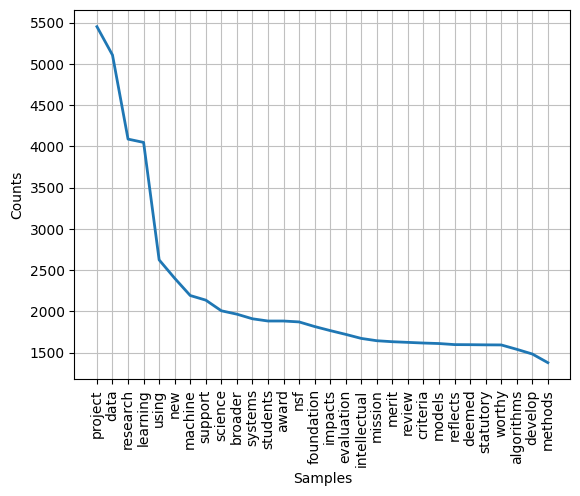

In [84]:
#Plot the frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()